In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from docx import Document
from docx.shared import Inches
import os

In [30]:
data=pd.read_csv("/home/gurkan/Desktop/IBD Project/code/Preprocessing/preprocessed_data.csv")
df=data.copy()
df.drop("has_eosinophilia",axis=1,inplace=True)

In [31]:
doc = Document()
doc.add_heading('Exploratory Data Analysis Report', level=1)
doc.add_heading('Summary of Target Variable', level=2)


In [32]:
font = {'family': 'serif',
        'weight': 'normal',
        'size': 12,
        }

plt.rc('font', **font)

plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6

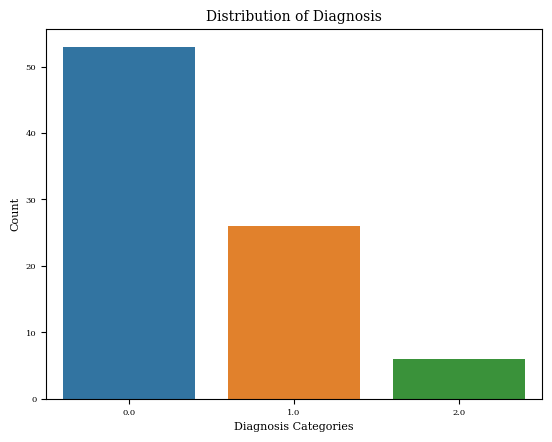

In [33]:
sns.countplot(x=df["diagnosis_enc"],data=df)
plt.xlabel("Diagnosis Categories")
plt.ylabel("Count")
plt.title("Distribution of Diagnosis")
hist_chart_1 = 'hist_chart1.png'
plt.savefig(hist_chart_1)

# Insert the pie chart into the DOC file
doc.add_picture(hist_chart_1, width=Inches(4))

In [34]:
doc.add_heading('Figure 1. Distribution of "diagnosis" column. "1.0" represents "UC", "2.0" represents "CD"', level=3)

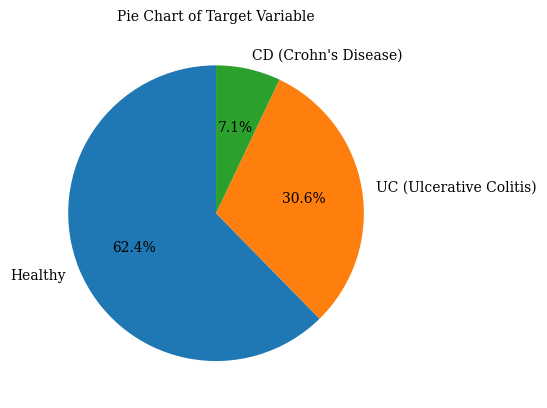

In [35]:
target_counts = df['diagnosis_enc'].value_counts()
custom_labels = ['Healthy', 'UC (Ulcerative Colitis)', 'CD (Crohn\'s Disease)']
plt.pie(target_counts, labels=custom_labels, autopct='%1.1f%%', startangle=90,textprops={"fontsize":10})
plt.gca().set_facecolor('#000000')
plt.title('Pie Chart of Target Variable')
pie_chart_path_1 = 'pie_chart_1.png'
plt.savefig(pie_chart_path_1)

# Insert the pie chart into the DOC file
doc.add_picture(pie_chart_path_1, width=Inches(4))

In [36]:
doc.add_heading('Figure 2. Visualisation of "diagnosis" column distribution by pie chart.', level=3)

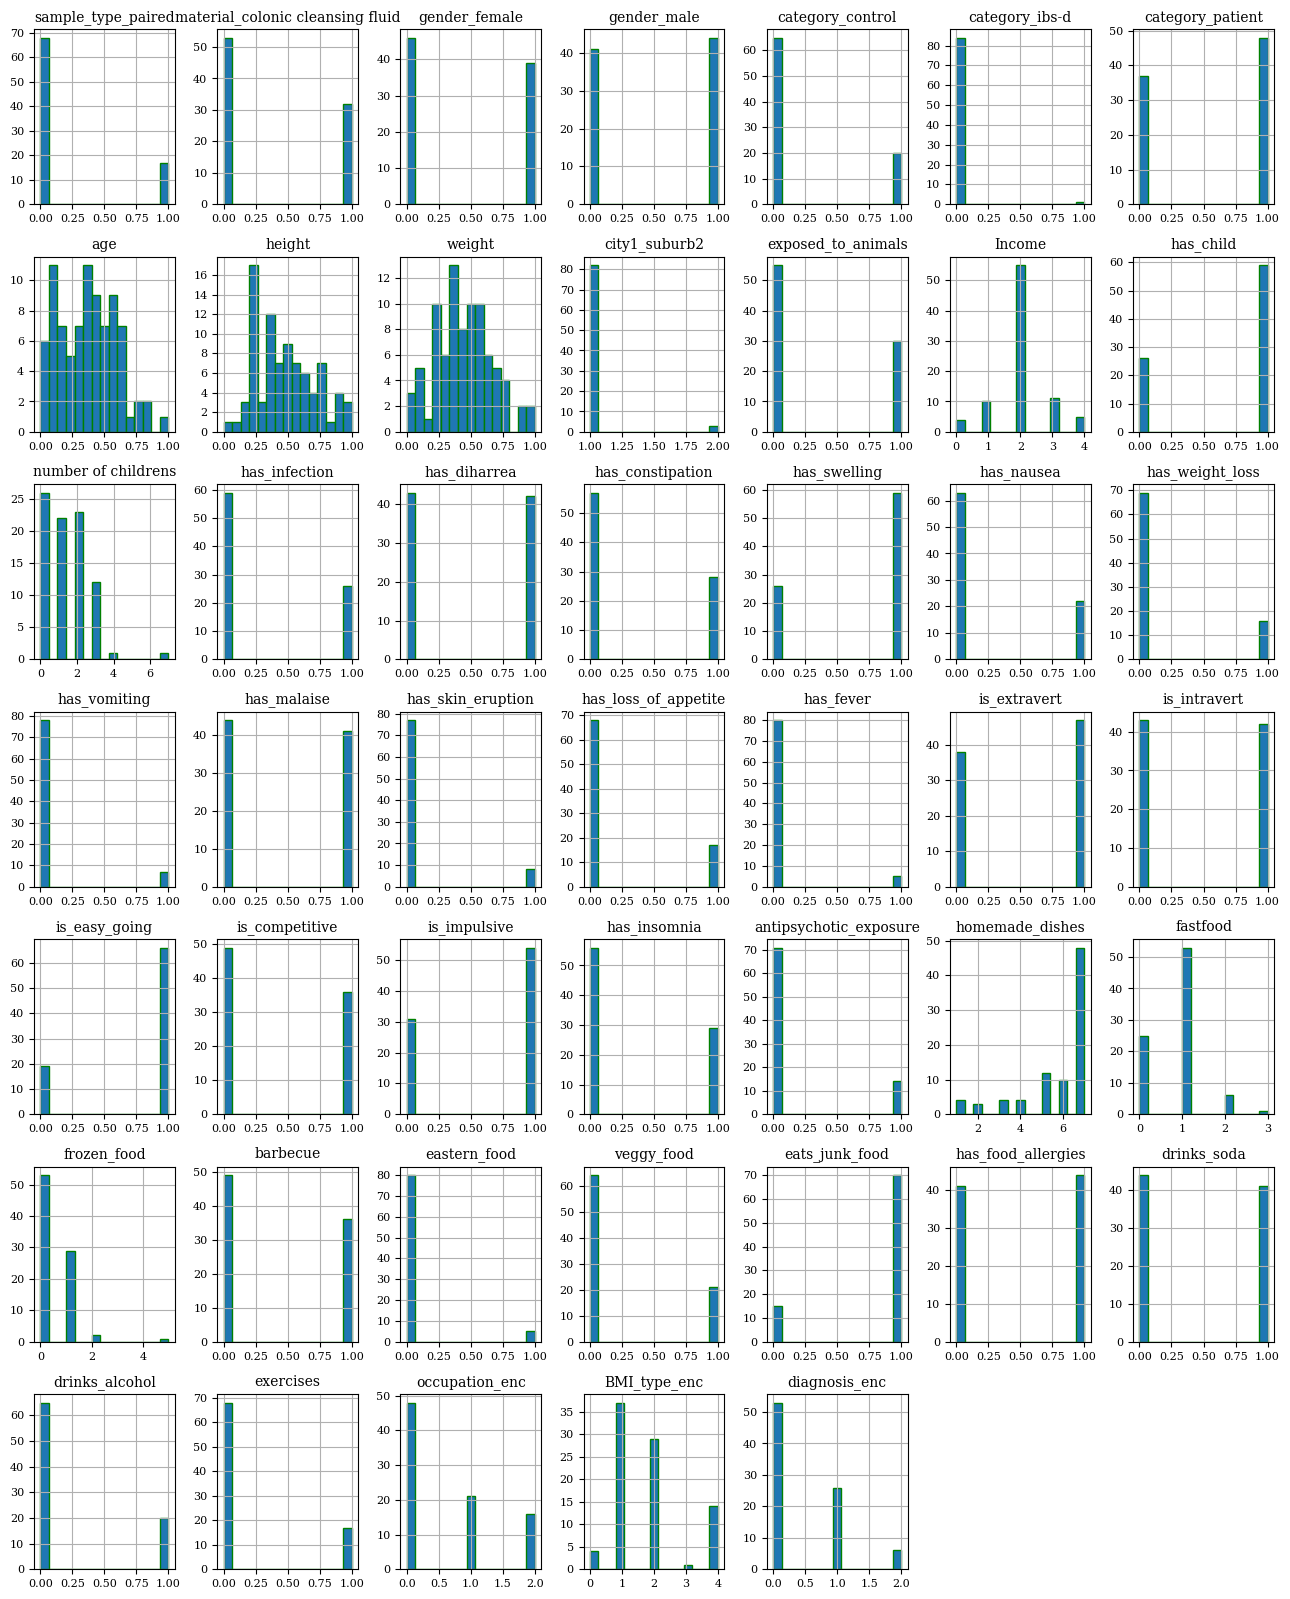

In [37]:
df.hist(figsize=(16, 20), bins=15, xlabelsize=8, ylabelsize=8,ec="green",lw=1)
doc.add_heading('Histogram Plots of Features', level=2)
multiple_hist_1 = 'multiple_hist_1.png'
plt.savefig(multiple_hist_1)
doc.add_picture(multiple_hist_1, width=Inches(8))

In [38]:
doc.add_heading('Figure 3. Histogram plots that show distribution of values for each column.', level=3)

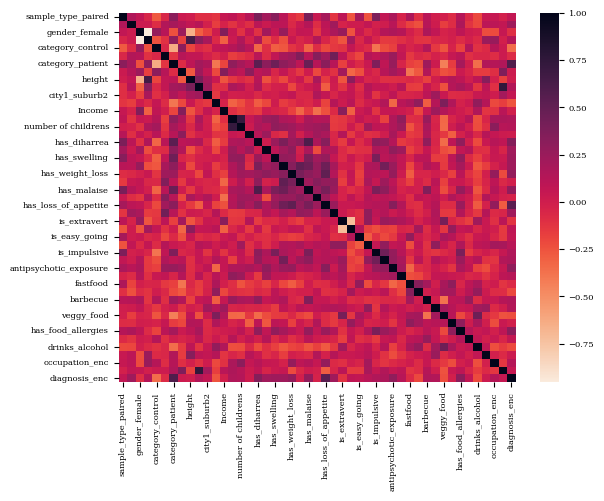

In [39]:
sns.heatmap(df.corr(),cmap="rocket_r")

doc.add_heading('Correlation', level=2)

corr_heatmap_1 = 'corr_heatmap_1.png'
plt.savefig(corr_heatmap_1)
doc.add_picture(corr_heatmap_1, width=Inches(8))

In [40]:
doc.add_heading('Figure 4. A correlation map to show relationships between features and target. ', level=3)


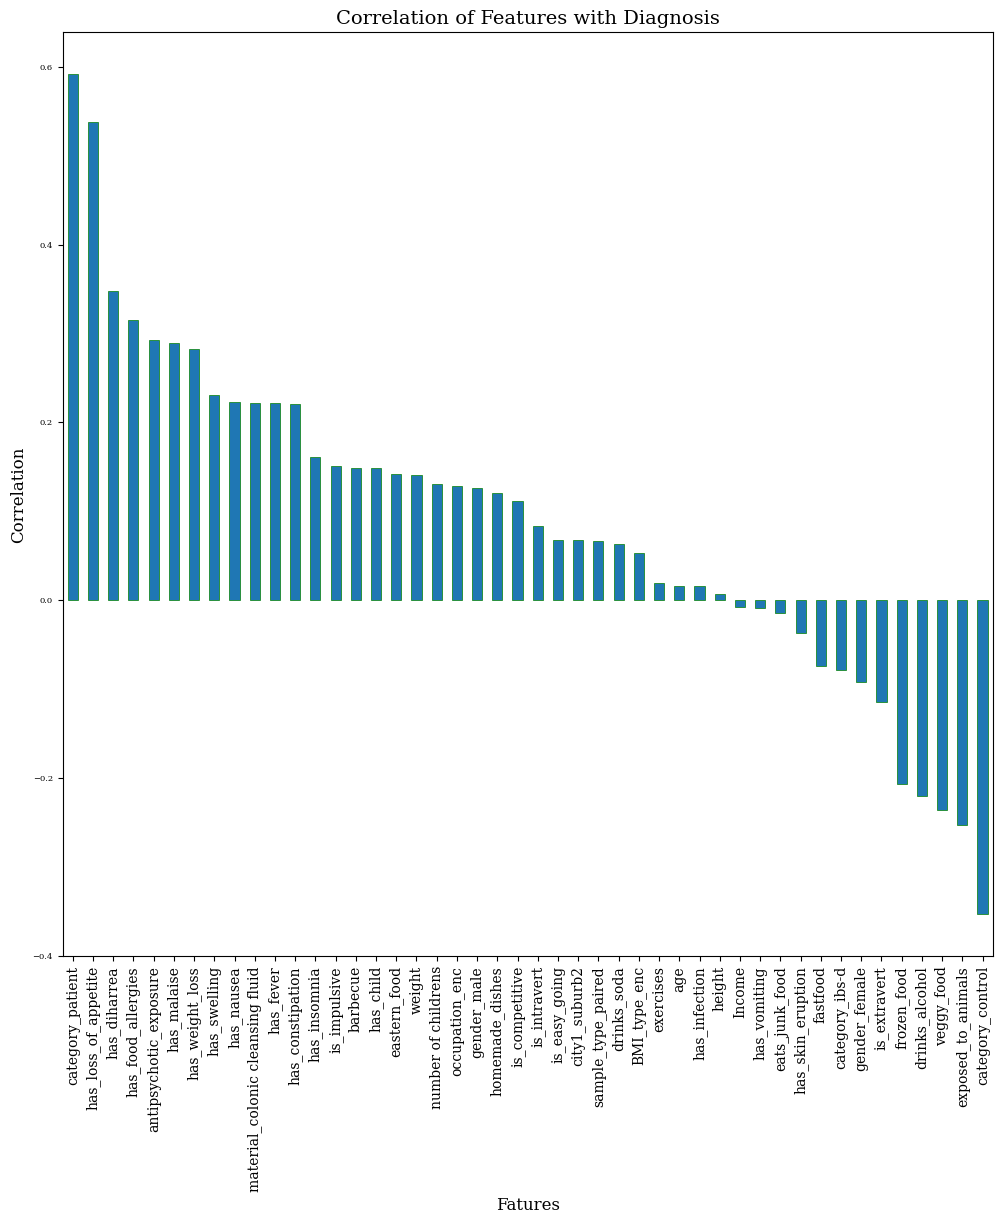

In [41]:

df_corr = df.corr()["diagnosis_enc"][:-1].sort_values(ascending=False)
plt.figure(figsize=(12,12))
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 14
df_corr.plot(kind="bar",ec="green",lw=0.5)
plt.title("Correlation of Features with Diagnosis")
plt.ylabel("Correlation")
plt.xlabel("Fatures")
corr_hist_1 = 'corr_hist_1.png'
plt.savefig(corr_hist_1)
doc.add_picture(corr_hist_1, width=Inches(8))


In [42]:
doc.add_heading('Figure 5. A bar plot that shows the correlation of features with target', level=3)


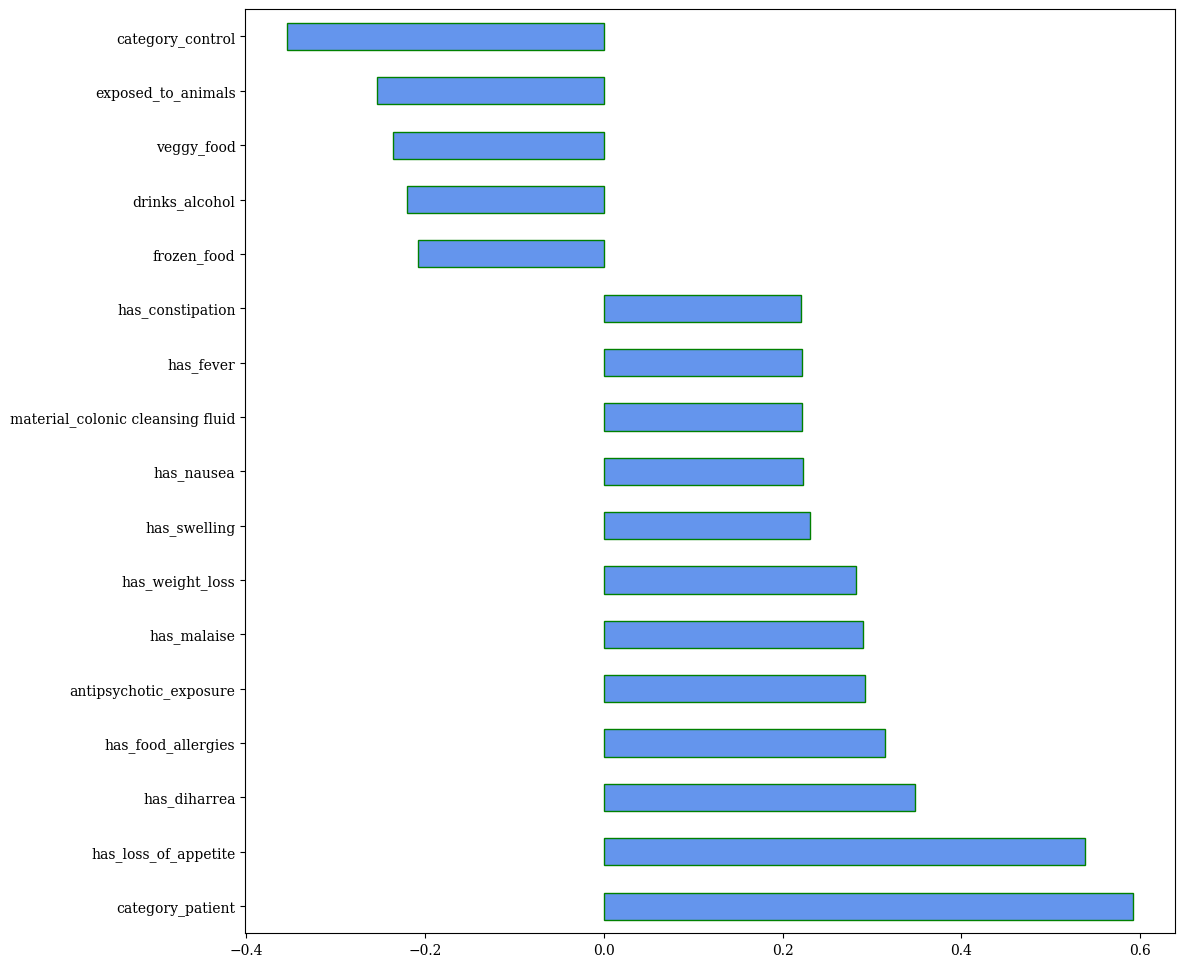

In [43]:
df_corr = df.corr()['diagnosis_enc'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.2].sort_values(ascending=False)
plt.figure(figsize=(12,12))

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 14
golden_features_list.plot(kind="barh",ec="green",color="cornflowerblue")

corr_hist_2 = 'corr_hist_2.png'
plt.savefig(corr_hist_2)
doc.add_picture(corr_hist_2, width=Inches(8))

In [44]:
doc.add_heading('Figure 6. Visualization of features that have higher than 0.2 absolute correlation values.', level=3)

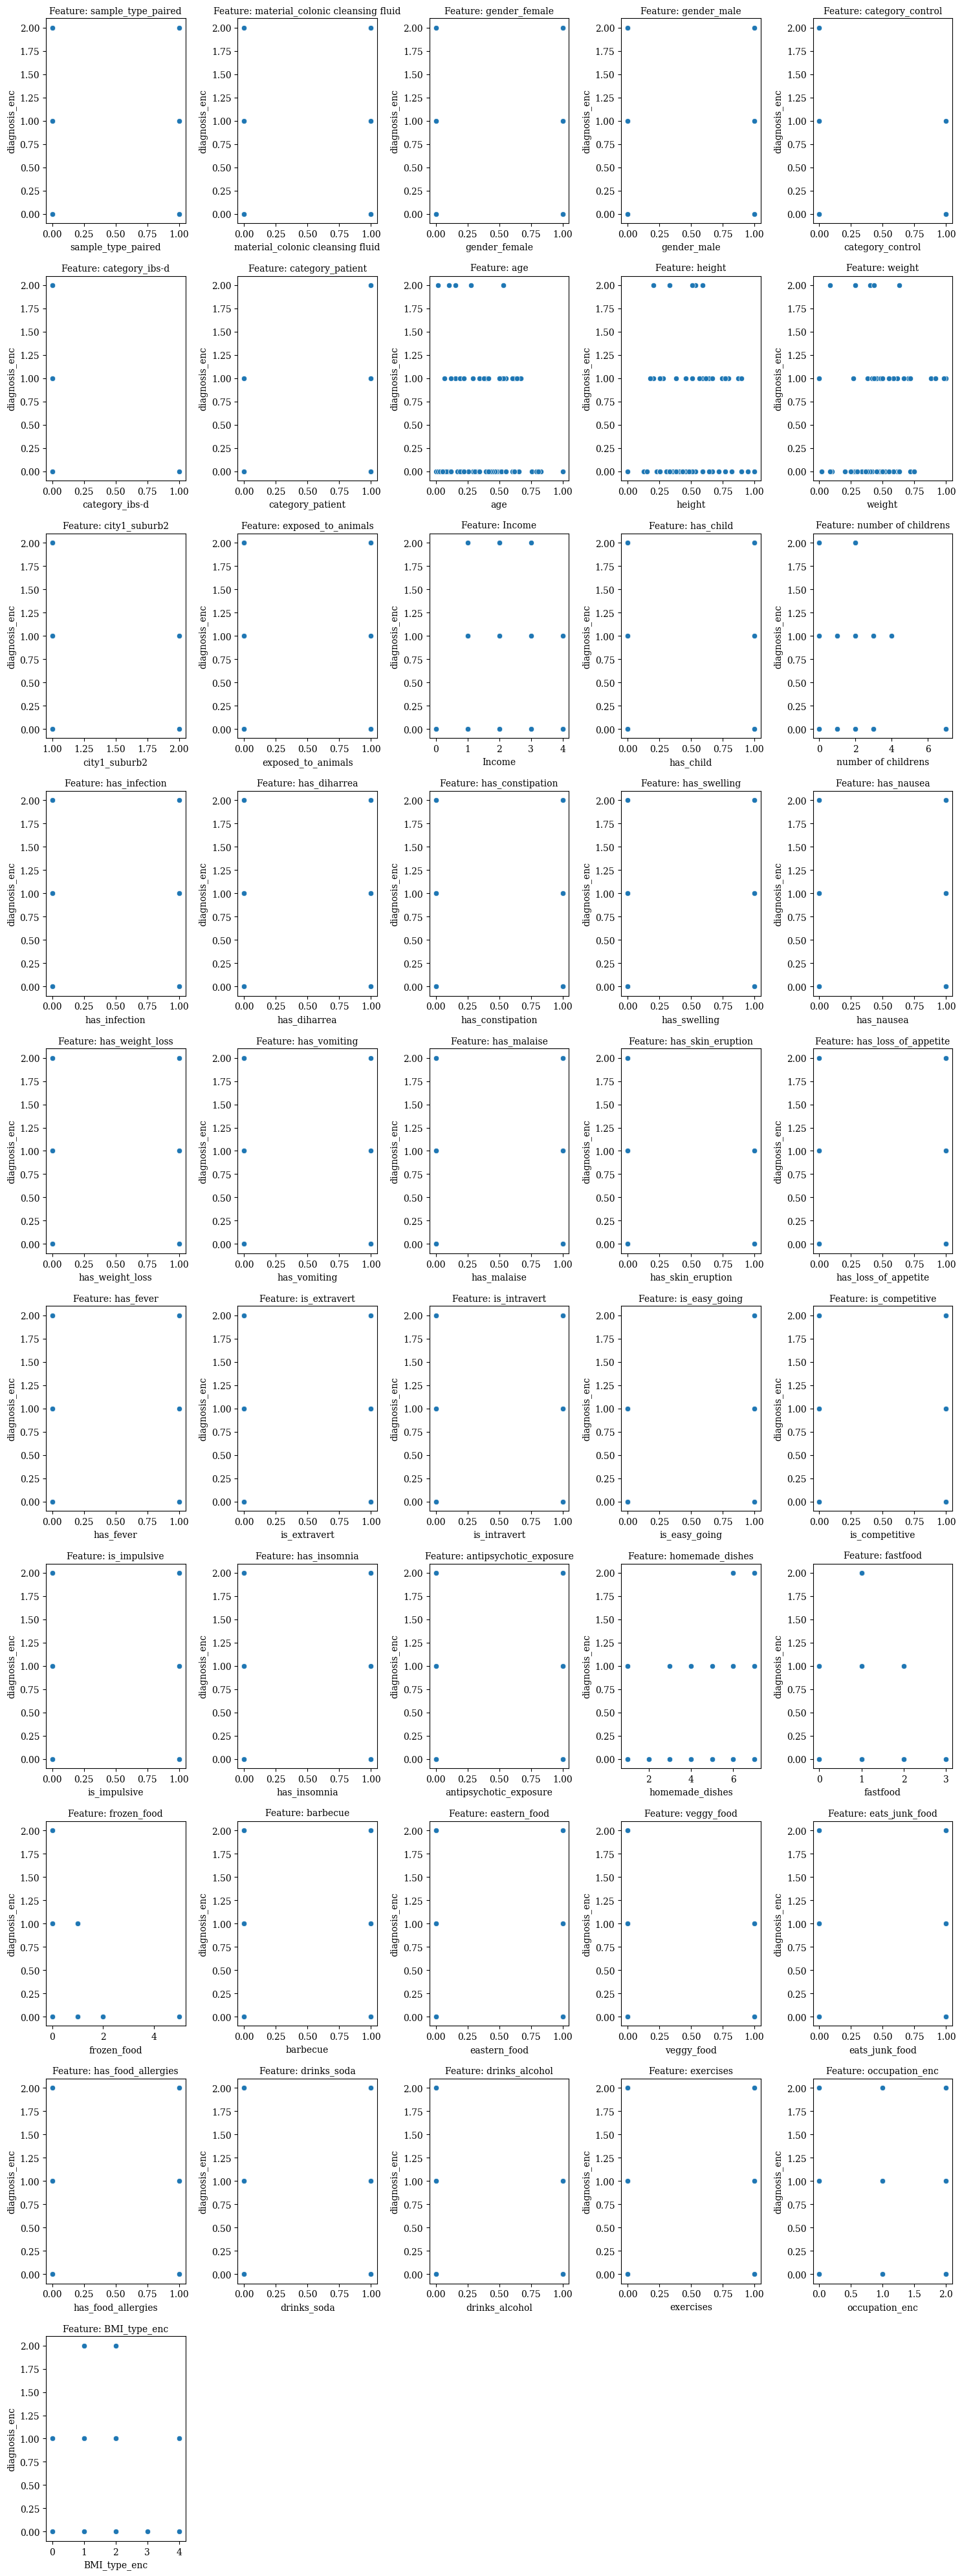

In [45]:
doc.add_heading('Scatter Plots', level=2)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] =10
plt.rcParams['axes.titlesize'] = 10
columns_per_row = 5
list(df.columns).remove("diagnosis_enc")
feature_columns=[]
for column_name in df.columns:
    if column_name!="diagnosis_enc":
        feature_columns.append(column_name)
num_rows = (len(feature_columns) + columns_per_row - 1) // columns_per_row
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 4*num_rows))
for i, feature in enumerate(feature_columns):
    row = i // columns_per_row
    col = i % columns_per_row
    sns.scatterplot(data=df, x=feature, y='diagnosis_enc', ax=axes[row, col])
    axes[row, col].set_title(f'Feature: {feature}')
if len(feature_columns) % columns_per_row != 0:
    for j in range(len(feature_columns) % columns_per_row, columns_per_row):
        fig.delaxes(axes[-1, j])
plt.tight_layout()
mulitple_scatter_1 = 'mulitple_scatter_1.png'
plt.savefig(mulitple_scatter_1)
doc.add_picture(mulitple_scatter_1, width=Inches(8))

In [46]:
doc.add_heading('Figure 7. Multiple scatter plots for features.', level=3)

In [47]:
doc_path="eda_report.docx"
doc.save(doc_path)